In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install statsmodels


#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import acf
from statsmodels.graphics.tsaplots import pacf
from statsmodels.tsa.stattools import acf

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#Import data set 
df = pd.read_csv(r"C:\Users\USER\Downloads\cleaned_data_TM_1.csv")
df

,Timestamp,Ost-VBZ Total,West-VBZ total
0,2024-01-18 00:00:00,1.0,4.0
1,2024-01-18 00:05:00,3.5,5.0
2,2024-01-18 00:10:00,6.0,3.0
3,2024-01-18 00:15:00,2.0,1.0
4,2024-01-18 00:20:00,1.5,1.0
...,...,...,...
87259,2024-11-15 23:35:00,1.0,16.0
87260,2024-11-15 23:40:00,76.0,6.0
87261,2024-11-15 23:45:00,26.0,9.0
87262,2024-11-15 23:50:00,21.0,3.0


In [3]:
# Data for the eastern side
df_ost = df[["Timestamp","Ost-VBZ Total"]]
df_ost

,Timestamp,Ost-VBZ Total
0,2024-01-18 00:00:00,1.0
1,2024-01-18 00:05:00,3.5
2,2024-01-18 00:10:00,6.0
3,2024-01-18 00:15:00,2.0
4,2024-01-18 00:20:00,1.5
...,...,...
87259,2024-11-15 23:35:00,1.0
87260,2024-11-15 23:40:00,76.0
87261,2024-11-15 23:45:00,26.0
87262,2024-11-15 23:50:00,21.0


In [4]:
# Data for the western side
df_west = df[["Timestamp","West-VBZ total"]]
df_west

,Timestamp,West-VBZ total
0,2024-01-18 00:00:00,4.0
1,2024-01-18 00:05:00,5.0
2,2024-01-18 00:10:00,3.0
3,2024-01-18 00:15:00,1.0
4,2024-01-18 00:20:00,1.0
...,...,...
87259,2024-11-15 23:35:00,16.0
87260,2024-11-15 23:40:00,6.0
87261,2024-11-15 23:45:00,9.0
87262,2024-11-15 23:50:00,3.0


In [5]:
# test stationarity for the eastern data
result_ost = adfuller(df_ost["Ost-VBZ Total"])
print("ADF Statistic:", result_ost[0])
print("p-value:", result_ost[1])
print("Critical Values:", result_ost[4])
result_ost

ADF Statistic: -35.96972106629923
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4304249950402257), '5%': np.float64(-2.861573146579214), '10%': np.float64(-2.566787642773583)}


(np.float64(-35.96972106629923),
 0.0,
 64,
 87199,
 {'1%': np.float64(-3.4304249950402257),
  '5%': np.float64(-2.861573146579214),
  '10%': np.float64(-2.566787642773583)},
 np.float64(700780.049943808))

In [6]:
# test stationarity for the western data
result_west = adfuller(df_west["West-VBZ total"])
print("ADF Statistic:", result_west[0])
print("p-value:", result_west[1])
print("Critical Values:", result_west[4])
result_west

ADF Statistic: -33.84974370615697
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4304249967604052), '5%': np.float64(-2.8615731473394956), '10%': np.float64(-2.566787643178256)}


(np.float64(-33.84974370615697),
 0.0,
 66,
 87197,
 {'1%': np.float64(-3.4304249967604052),
  '5%': np.float64(-2.8615731473394956),
  '10%': np.float64(-2.566787643178256)},
 np.float64(615740.026274327))

In [7]:
# because the p-values are in each case lower than 0.05, we come to the conclusion that the 
# dataset on both sides is stationary, meaning that no differcing is necessary

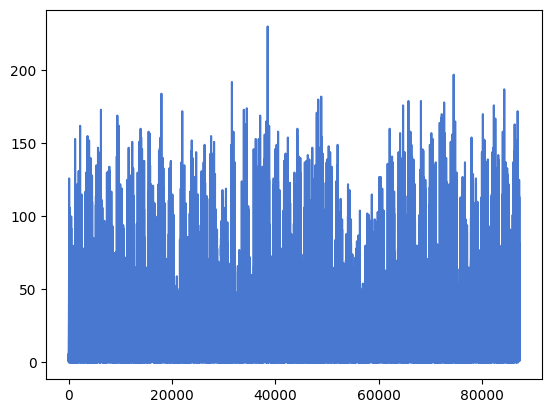

In [8]:
# plot the eastern side 
plt.plot(df_ost["Ost-VBZ Total"])

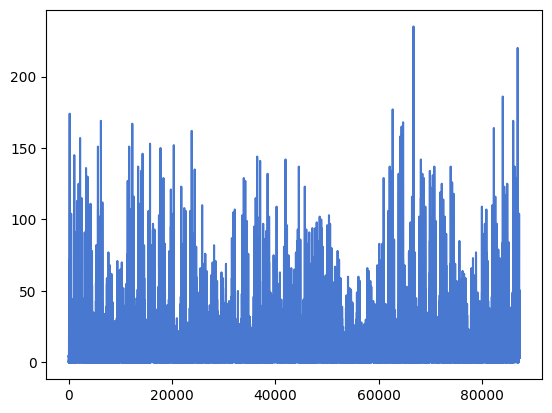

In [9]:
# plot the western side of the dataset
plt.plot(df_west["West-VBZ total"])

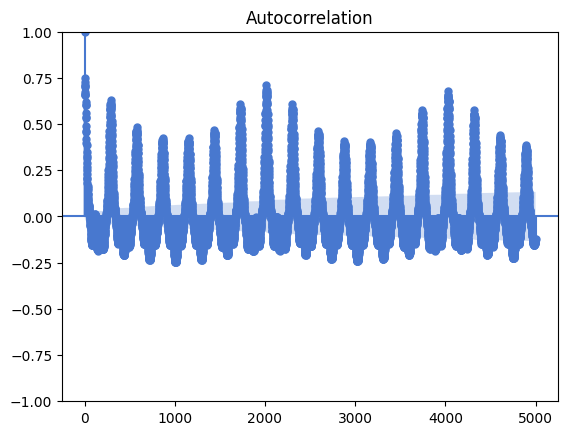

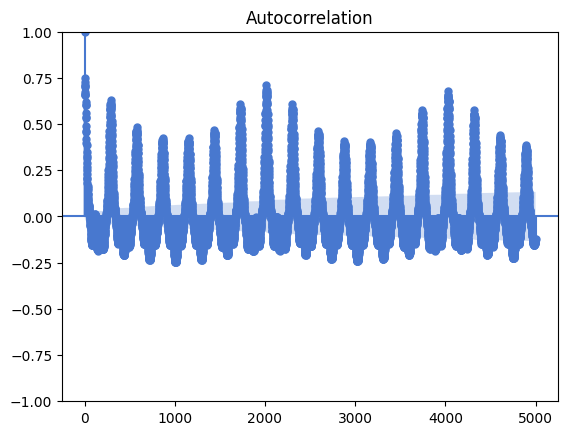

In [10]:
# plot the ACF of the western side of the data
plot_acf(df_ost["Ost-VBZ Total"], lags = 5000)
# it is a sinus function approximately

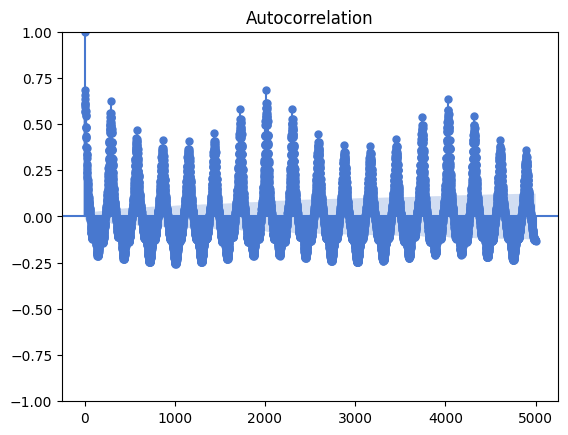

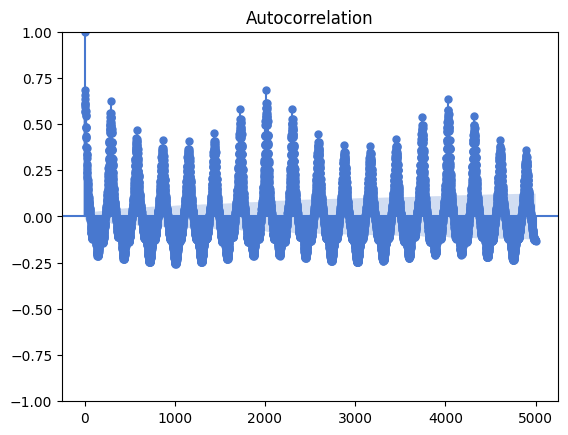

In [11]:
# plot the acf for the western side of the data  side
plot_acf(df_west["West-VBZ total"], lags = 5000)
# like the western side, it is a sinus function approximately

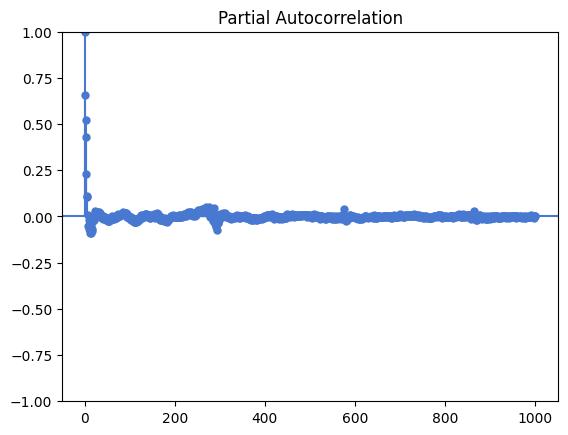

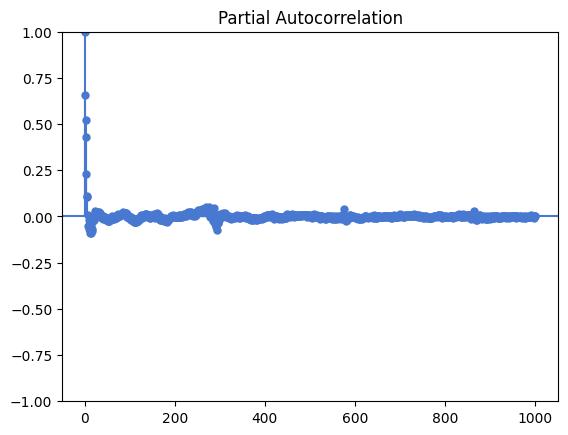

In [12]:
# plot the pacf function for the eastern side
plot_pacf(df_ost["Ost-VBZ Total"], lags = 1000)

# it apparently converges to zero

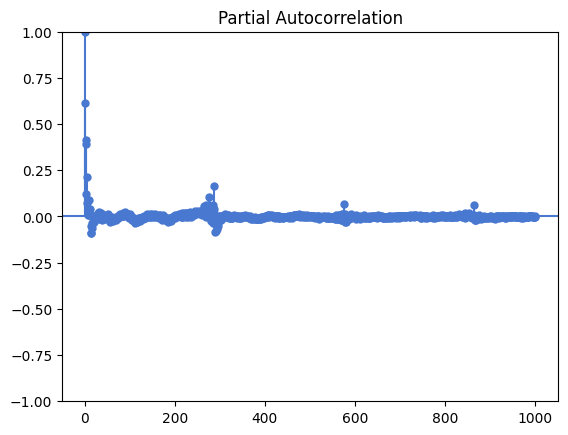

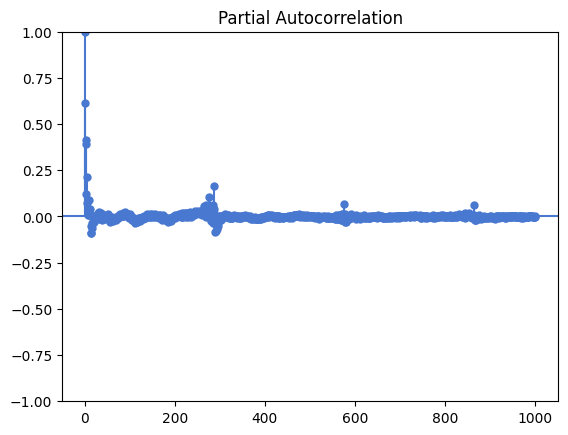

In [13]:
# plot the pacf function for the western side
plot_pacf(df_west["West-VBZ total"], lags = 1000)

# it also apparently convergers to zero

In [14]:
# Because the ACFs are sinus functions and the PACFs converge to zero, we come to the conclusion
# that we should use the AR model (autoregressive) based on the decision table shown in the lecture

In [15]:
# decompostion of the eastern side of the dataset following an addivitive model
decomposition_ost = seasonal_decompose(df_ost["Ost-VBZ Total"], model='additive', period = 1000, filt=None, two_sided=True, extrapolate_trend=0)
decomposition_ost

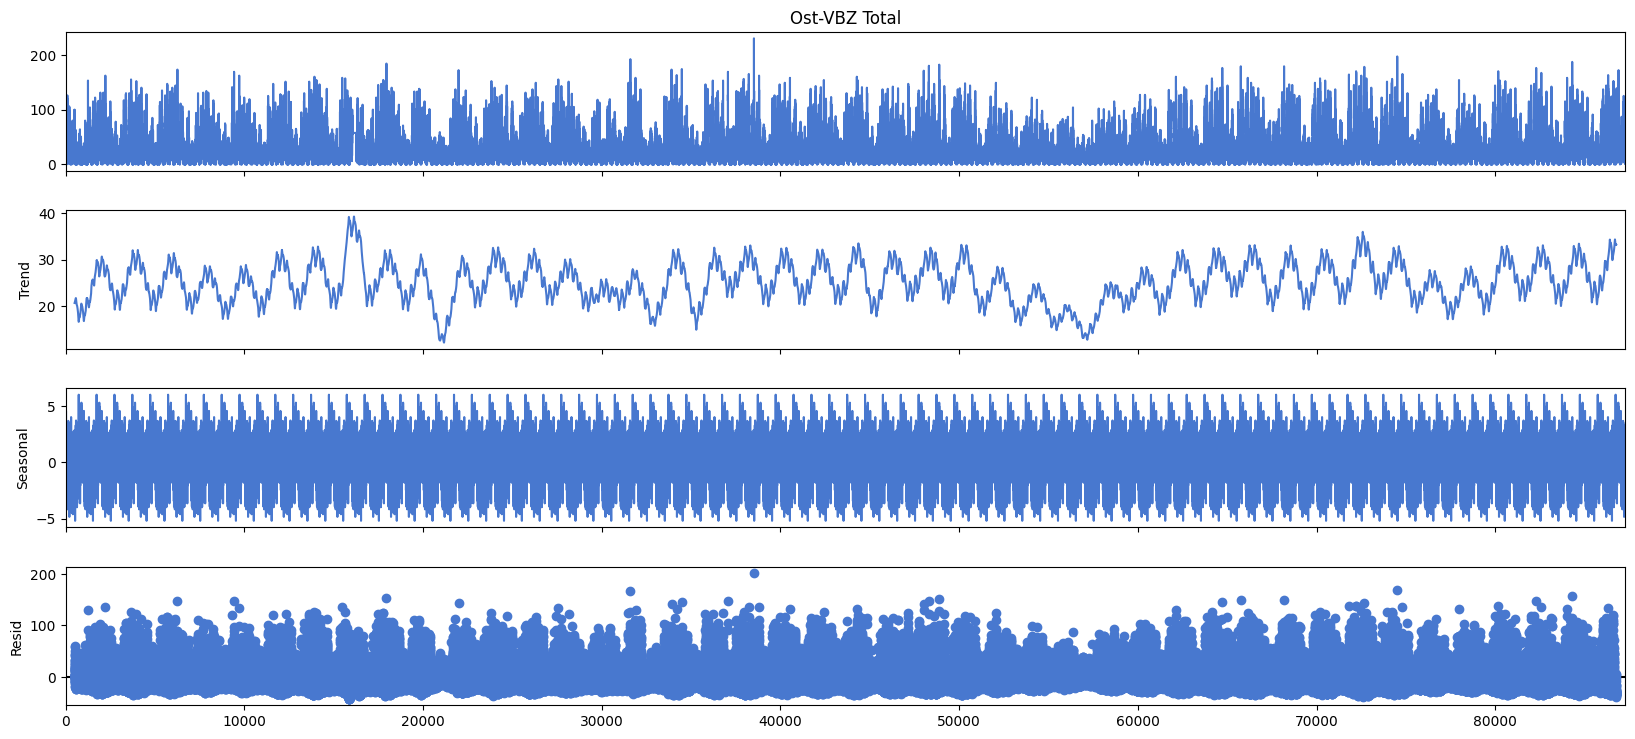

In [16]:
fig = decomposition_ost.plot()
fig.set_size_inches((18, 8))  ##
plt.show()

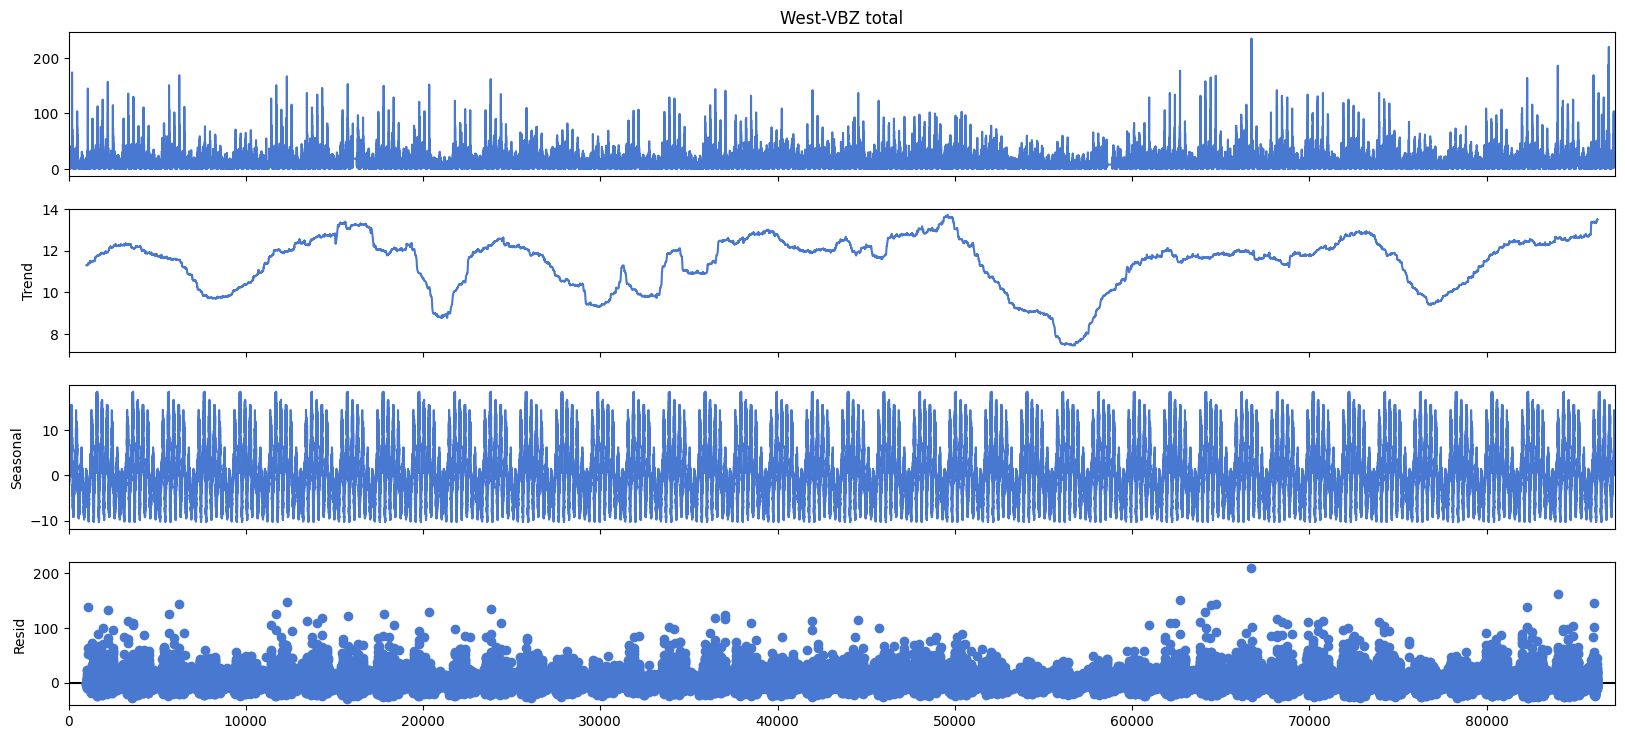

In [17]:
# reproduce the decomposition for the other side foolowing an addiviitve model
decomposition_west = seasonal_decompose(df_west["West-VBZ total"], model='additive', filt=None, period=2018, two_sided=True, extrapolate_trend=0)
decomposition_west
fig = decomposition_west.plot()
fig.set_size_inches((18, 8))  ##
plt.show()

In [18]:
acf_ost = acf(df_ost["Ost-VBZ Total"], fft = True)
acf_ost

array([1.        , 0.65543043, 0.72642597, 0.74864612, 0.70789374,
       0.69954065, 0.71053212, 0.67288632, 0.6567764 , 0.66098521,
       0.62128044, 0.60338262, 0.60346715, 0.561896  , 0.53775169,
       0.53026619, 0.49108163, 0.46322063, 0.45968849, 0.41969755,
       0.39667343, 0.38432468, 0.35010226, 0.32720879, 0.31911992,
       0.28791489, 0.26671933, 0.25322219, 0.23008212, 0.20986318,
       0.20123721, 0.18141865, 0.16515946, 0.15353067, 0.14279515,
       0.12333795, 0.12113355, 0.10728008, 0.09599464, 0.08955518,
       0.08343161, 0.06954025, 0.0703225 , 0.06238854, 0.05416653,
       0.05053735, 0.04893572, 0.03873784, 0.03571646, 0.03512881])

In [19]:
acf_west= acf(df_west["West-VBZ total"], fft = True)
acf_west

array([1.        , 0.6135309 , 0.63568535, 0.68515121, 0.60160125,
       0.59457446, 0.65834427, 0.56597749, 0.57059782, 0.60764737,
       0.54614254, 0.54915686, 0.57242853, 0.48564908, 0.47820901,
       0.48509245, 0.42863875, 0.42732496, 0.43596704, 0.37821104,
       0.37568961, 0.36906753, 0.33850695, 0.33079165, 0.31905845,
       0.28217958, 0.27393185, 0.25866999, 0.24057662, 0.23688347,
       0.22050807, 0.20797258, 0.19858181, 0.17923678, 0.17496581,
       0.16514254, 0.15102853, 0.14753704, 0.1354613 , 0.11718473,
       0.12306476, 0.11536491, 0.09943622, 0.10480378, 0.09357077,
       0.07660906, 0.08567753, 0.07484219, 0.06514063, 0.07064184])

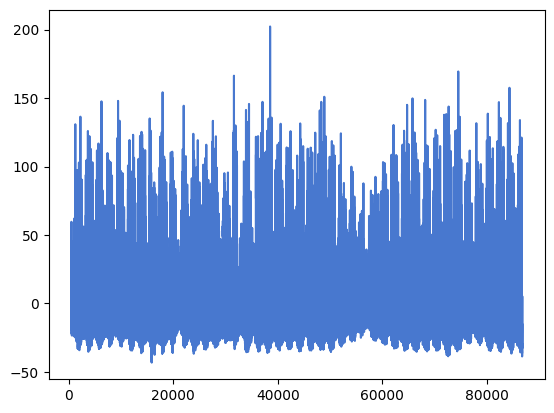

In [20]:
# Plot and Calculate the residuals for the eastern side
residuals_ost = df_ost["Ost-VBZ Total"] - decomposition_ost.trend - decomposition_ost.seasonal
residuals_ost.dropna()

plt.plot(residuals_ost)

plt.show()

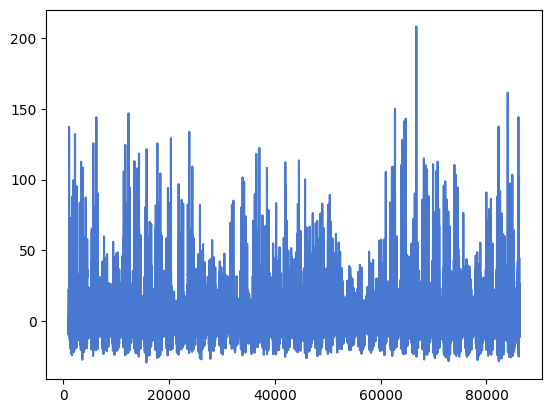

In [21]:
# calculate and plot the residuals of the western side
residuals_west = df_west["West-VBZ total"] - decomposition_west.trend - decomposition_west.seasonal
residuals_west.dropna()

plt.plot(residuals_west)

plt.show()

In [22]:
# Calculate unit root test for residuals on the eastern side
result_residualsost = adfuller(residuals_ost.dropna())
print("ADF Statistic:", result_residualsost[0])
print("p-value:", result_residualsost[1])
print("Critical Values:", result_residualsost[4])
result_residualsost

ADF Statistic: -38.21799479993445
p-value: 0.0
Critical Values: {'1%': np.float64(-3.430425865968449), '5%': np.float64(-2.8615735315103006), '10%': np.float64(-2.5667878476598966)}


(np.float64(-38.21799479993445),
 0.0,
 65,
 86198,
 {'1%': np.float64(-3.430425865968449),
  '5%': np.float64(-2.8615735315103006),
  '10%': np.float64(-2.5667878476598966)},
 np.float64(690987.7514214548))

In [23]:
# Calculate unit root test for residuals on the western side
result_residualswest = adfuller(residuals_west.dropna())
print("ADF Statistic:", result_residualswest[0])
print("p-value:", result_residualswest[1])
print("Critical Values:", result_residualswest[4])
result_residualswest

ADF Statistic: -40.8194264042189
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4304267726822726), '5%': np.float64(-2.8615739322577136), '10%': np.float64(-2.5667880609647478)}


(np.float64(-40.8194264042189),
 0.0,
 65,
 85180,
 {'1%': np.float64(-3.4304267726822726),
  '5%': np.float64(-2.8615739322577136),
  '10%': np.float64(-2.5667880609647478)},
 np.float64(596861.1078129507))

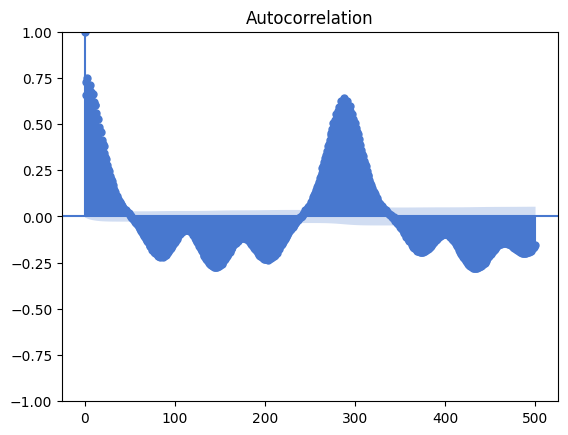

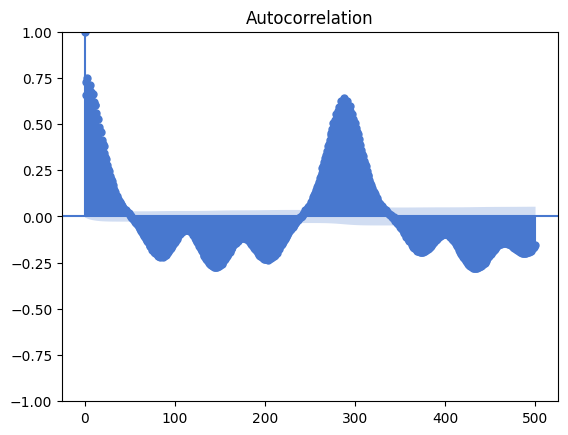

In [24]:
# Plot the ACF function for the residuals on the eastern side 
plot_acf(residuals_ost.dropna(),lags = 500)

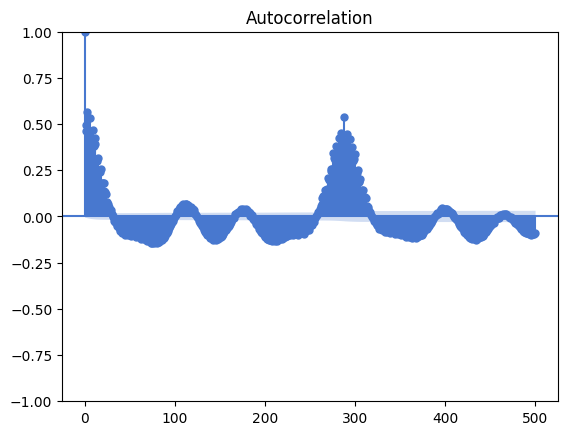

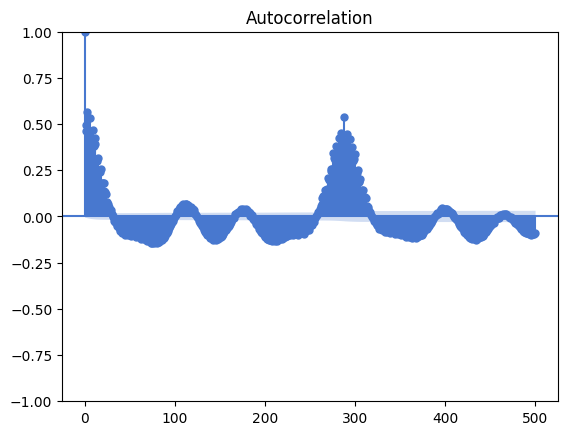

In [25]:
# Plot the ACF function for the residuals on the western side 

plot_acf(residuals_west.dropna(),lags = 500)

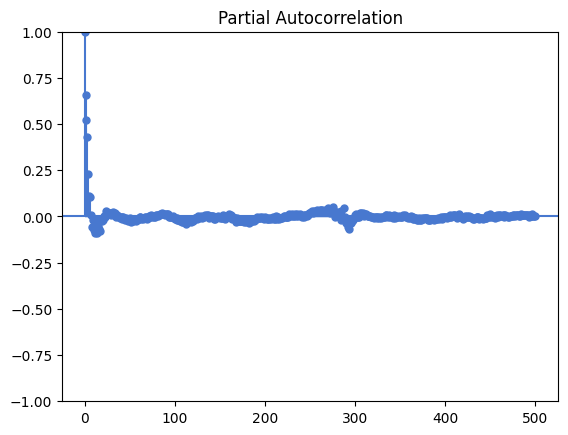

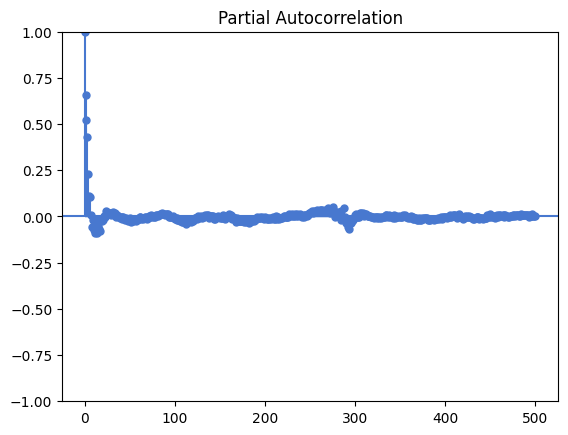

In [26]:
# Plot the PACF function for the residuals on the eastern side 

plot_pacf(residuals_ost.dropna(),lags = 500)

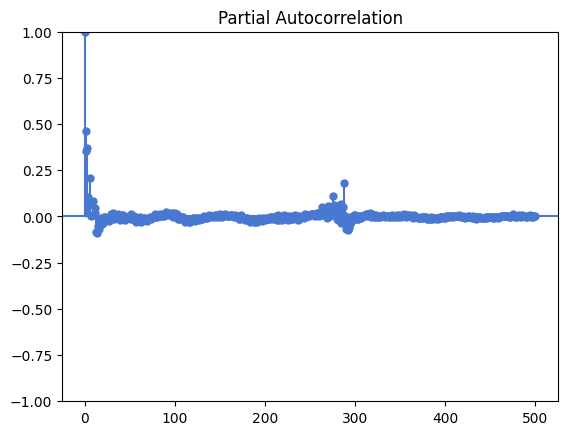

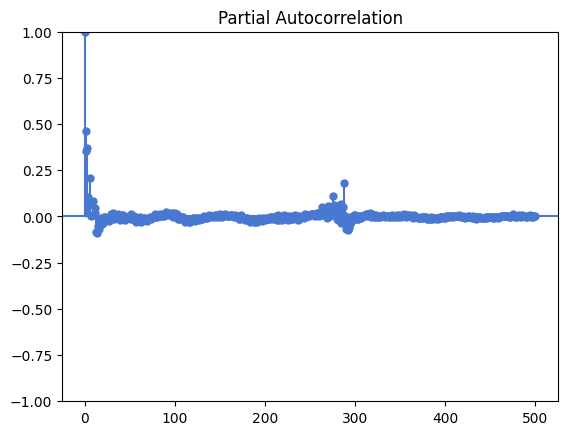

In [27]:
# Plot the PACF function for the residuals on the Western side 

plot_pacf(residuals_west.dropna(),lags = 500)

In [28]:
# Forecasting for the ost side
# We train our model with train_ost and test_ost
import sklearn.metrics
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
df_ost["Ost-VBZ Total"]
df_west["West-VBZ total"]
# 80.58% for training  following a expanding window validation
# we choose this exact number to have full days in our training and testing sets

df_ost_train = int(len(df_ost)*0.808580858085808580858085808580858085808580858085)
train_ost ,test_ost = df_ost[:df_ost_train], df_ost[df_ost_train:]

from sklearn.model_selection import TimeSeriesSplit
# rolling windows
tscv = TimeSeriesSplit(n_splits=10)

len(train_ost),len(test_ost)
# We have (70560/288 = 245) days in our training set and 58 days for our testing set 

(70560, 16704)

In [29]:
# Create and train the autoregressive model
# determine number of lags
lags = 288
ar_model_ost = AutoReg(train_ost["Ost-VBZ Total"], lags=lags)
results_ar_ost = ar_model_ost.fit()

In [30]:
# Make predictions on the testing set for the eastern side
y_pred_ost = results_ar_ost.predict(start=len(train_ost["Ost-VBZ Total"]), end=len(train_ost["Ost-VBZ Total"]) + len(test_ost["Ost-VBZ Total"])-1)
#print(y_pred)
y_pred_ost

70560     3.253552
70561     0.718268
70562     3.024786
70563     1.942605
70564    -0.954694
           ...    
87259    24.863053
87260    24.863421
87261    24.863780
87262    24.864130
87263    24.864471
Length: 16704, dtype: float64

In [31]:
# Calculate MAE and RMSE for the eastern side
mae_ost = mean_absolute_error(test_ost["Ost-VBZ Total"], y_pred_ost)
rmse_ost = mean_squared_error(test_ost["Ost-VBZ Total"], y_pred_ost)
print(f'Mean Absolute Error: {mae_ost:.2f}')
print(f'Root Mean Squared Error: {rmse_ost:.2f}')

Mean Absolute Error: 18.66
Root Mean Squared Error: 647.69


C:\Users\USER\AppData\Local\Temp\ipykernel_14892\2464037810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ost["Timestamp"] = pd.to_datetime(test_ost["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\2464037810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ost["Timestamp"] = pd.to_datetime(train_ost["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\2464037810.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' inst

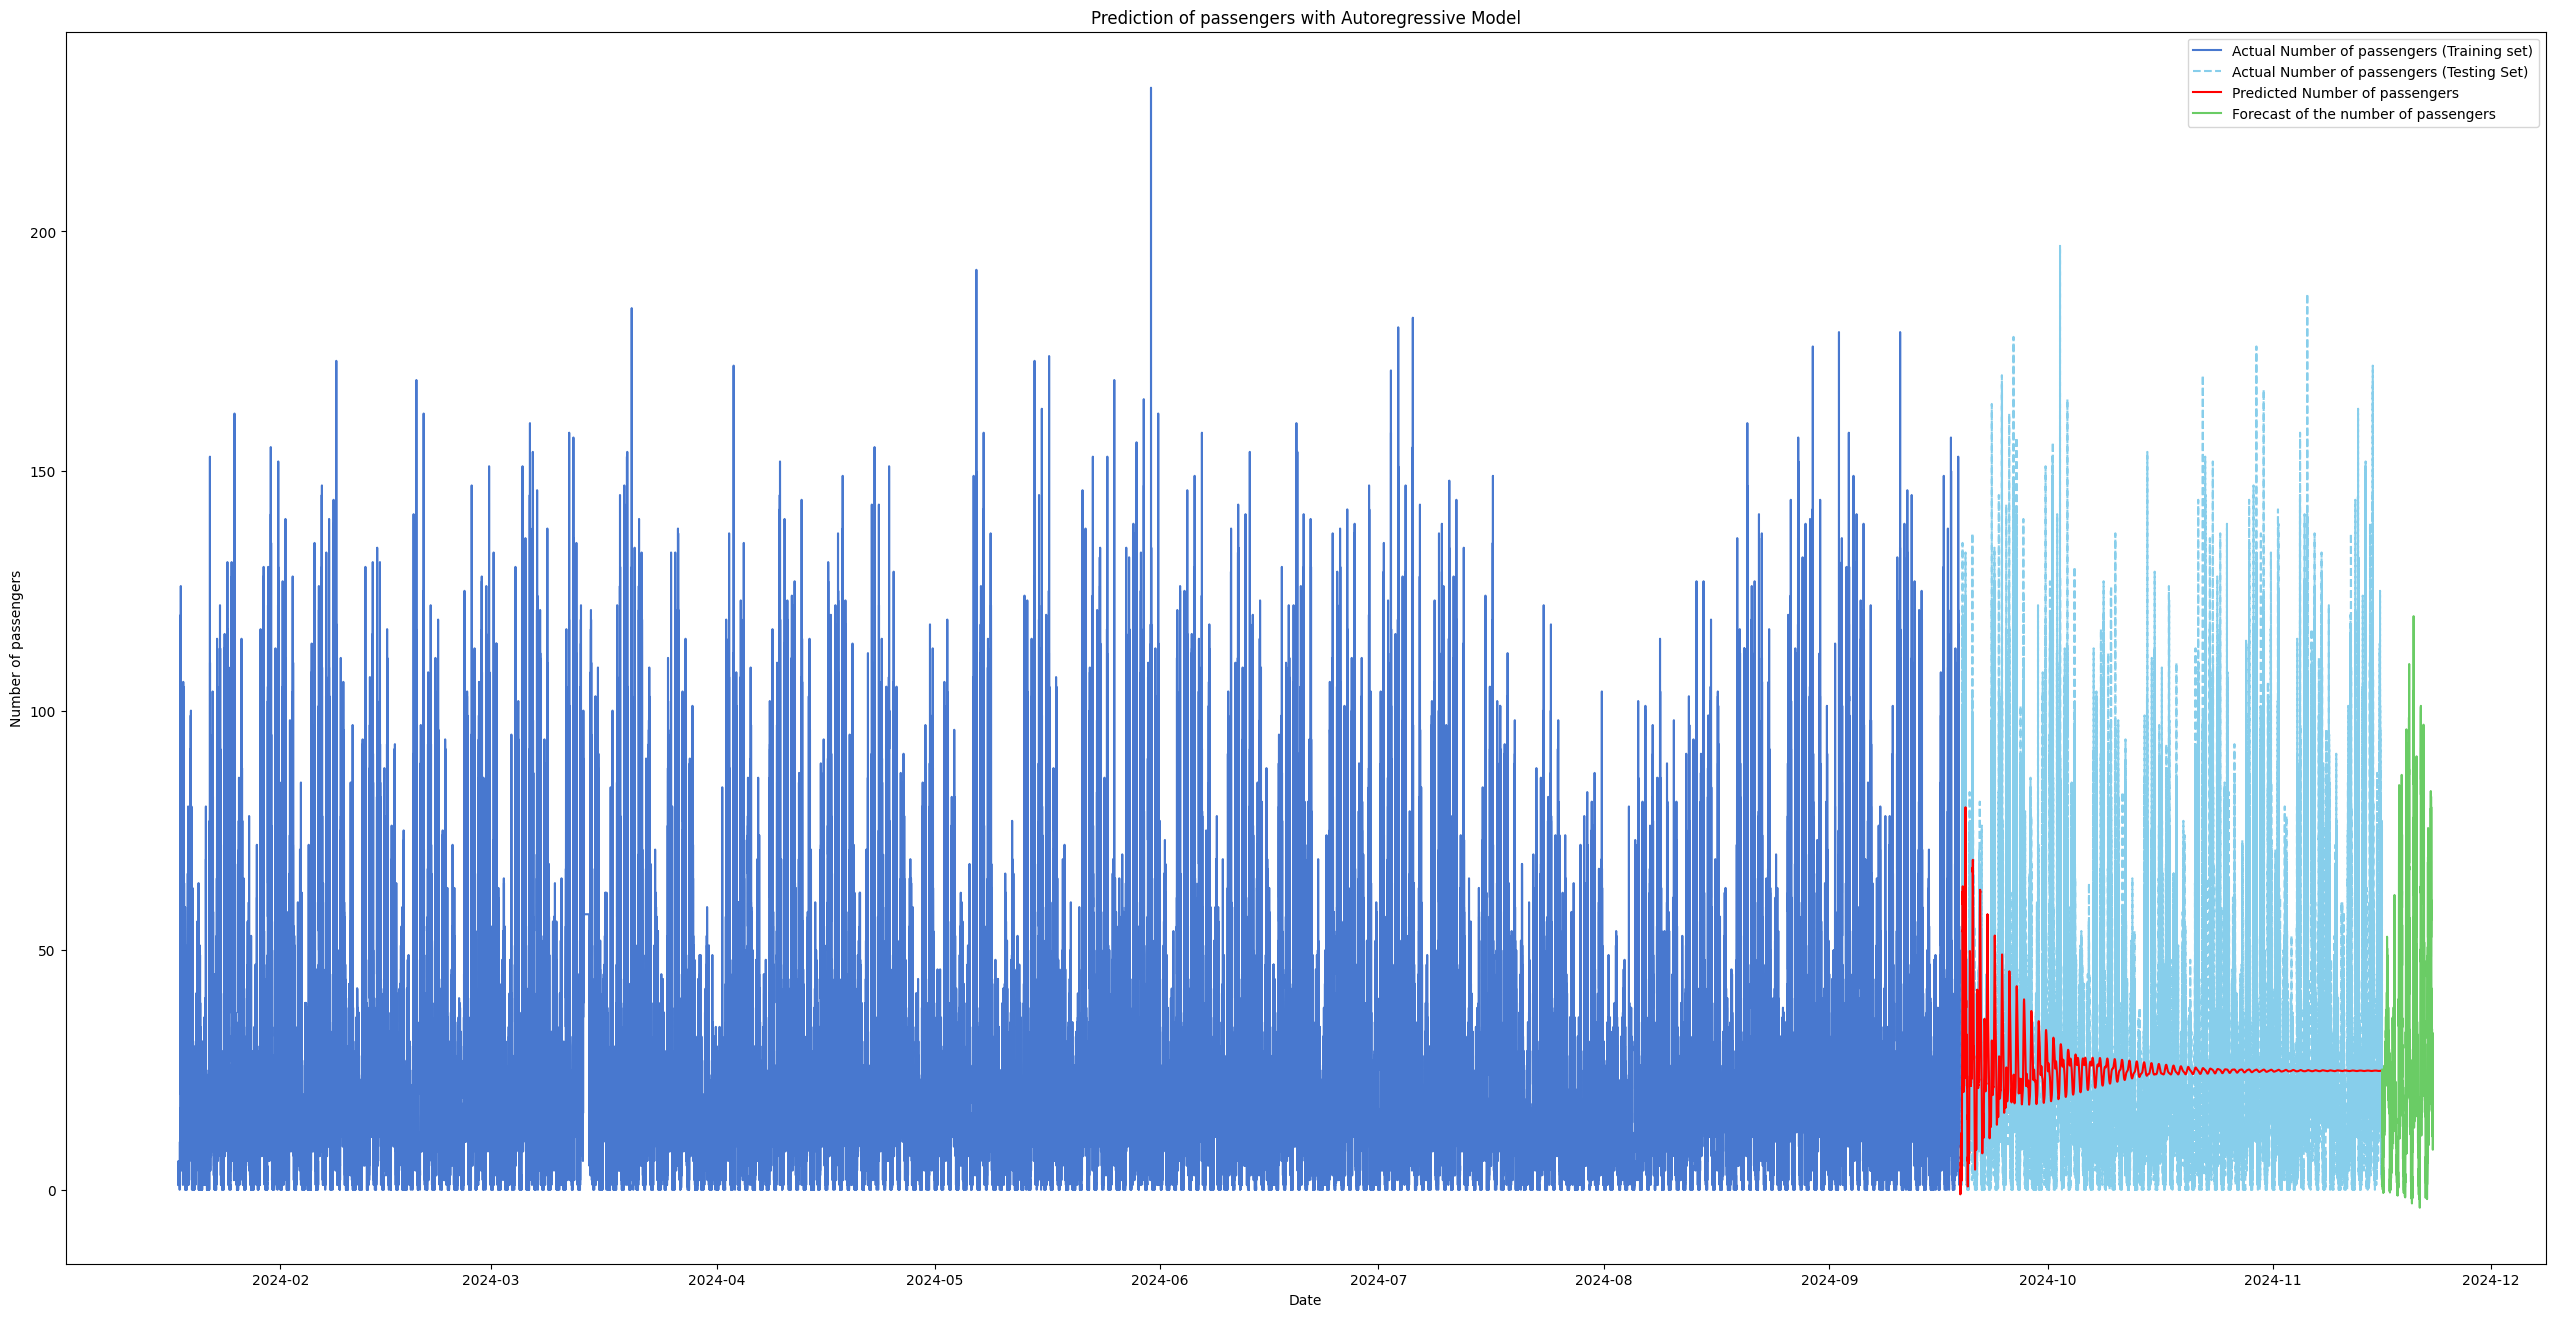

In [32]:
# Number of 5 minutes intervals in one day (288)
day = 288
# Number of 5-minutes intervals in our week (7 days)
forecast_steps_ost = 7*day
# convert stamp into datetime
test_ost["Timestamp"] = pd.to_datetime(test_ost["Timestamp"])
train_ost["Timestamp"] = pd.to_datetime(train_ost["Timestamp"])

# Make future predictions
future_predictions_ost = results_ar_ost.predict(start=len(test_ost), end=len(test_ost) + forecast_steps_ost - 1)
# determine future dates
future_dates_ost = pd.date_range(start=test_ost["Timestamp"].iloc[-1], periods=forecast_steps_ost, freq='5T')

# Plot training set, testing set, prediction on our data testing set, and future predictions
plt.figure(figsize=(32, 16))
plt.plot(train_ost["Timestamp"],train_ost["Ost-VBZ Total"], label = "Actual Number of passengers (Training set)")
plt.plot(test_ost["Timestamp"],test_ost["Ost-VBZ Total"], label='Actual Number of passengers (Testing Set)', linestyle = "--",color = "skyblue")
plt.plot(test_ost["Timestamp"],y_pred_ost, label='Predicted Number of passengers', color = "red")
plt.plot(future_dates_ost, future_predictions_ost, label = "Forecast of the number of passengers")

plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Prediction of passengers with Autoregressive Model')
plt.show()



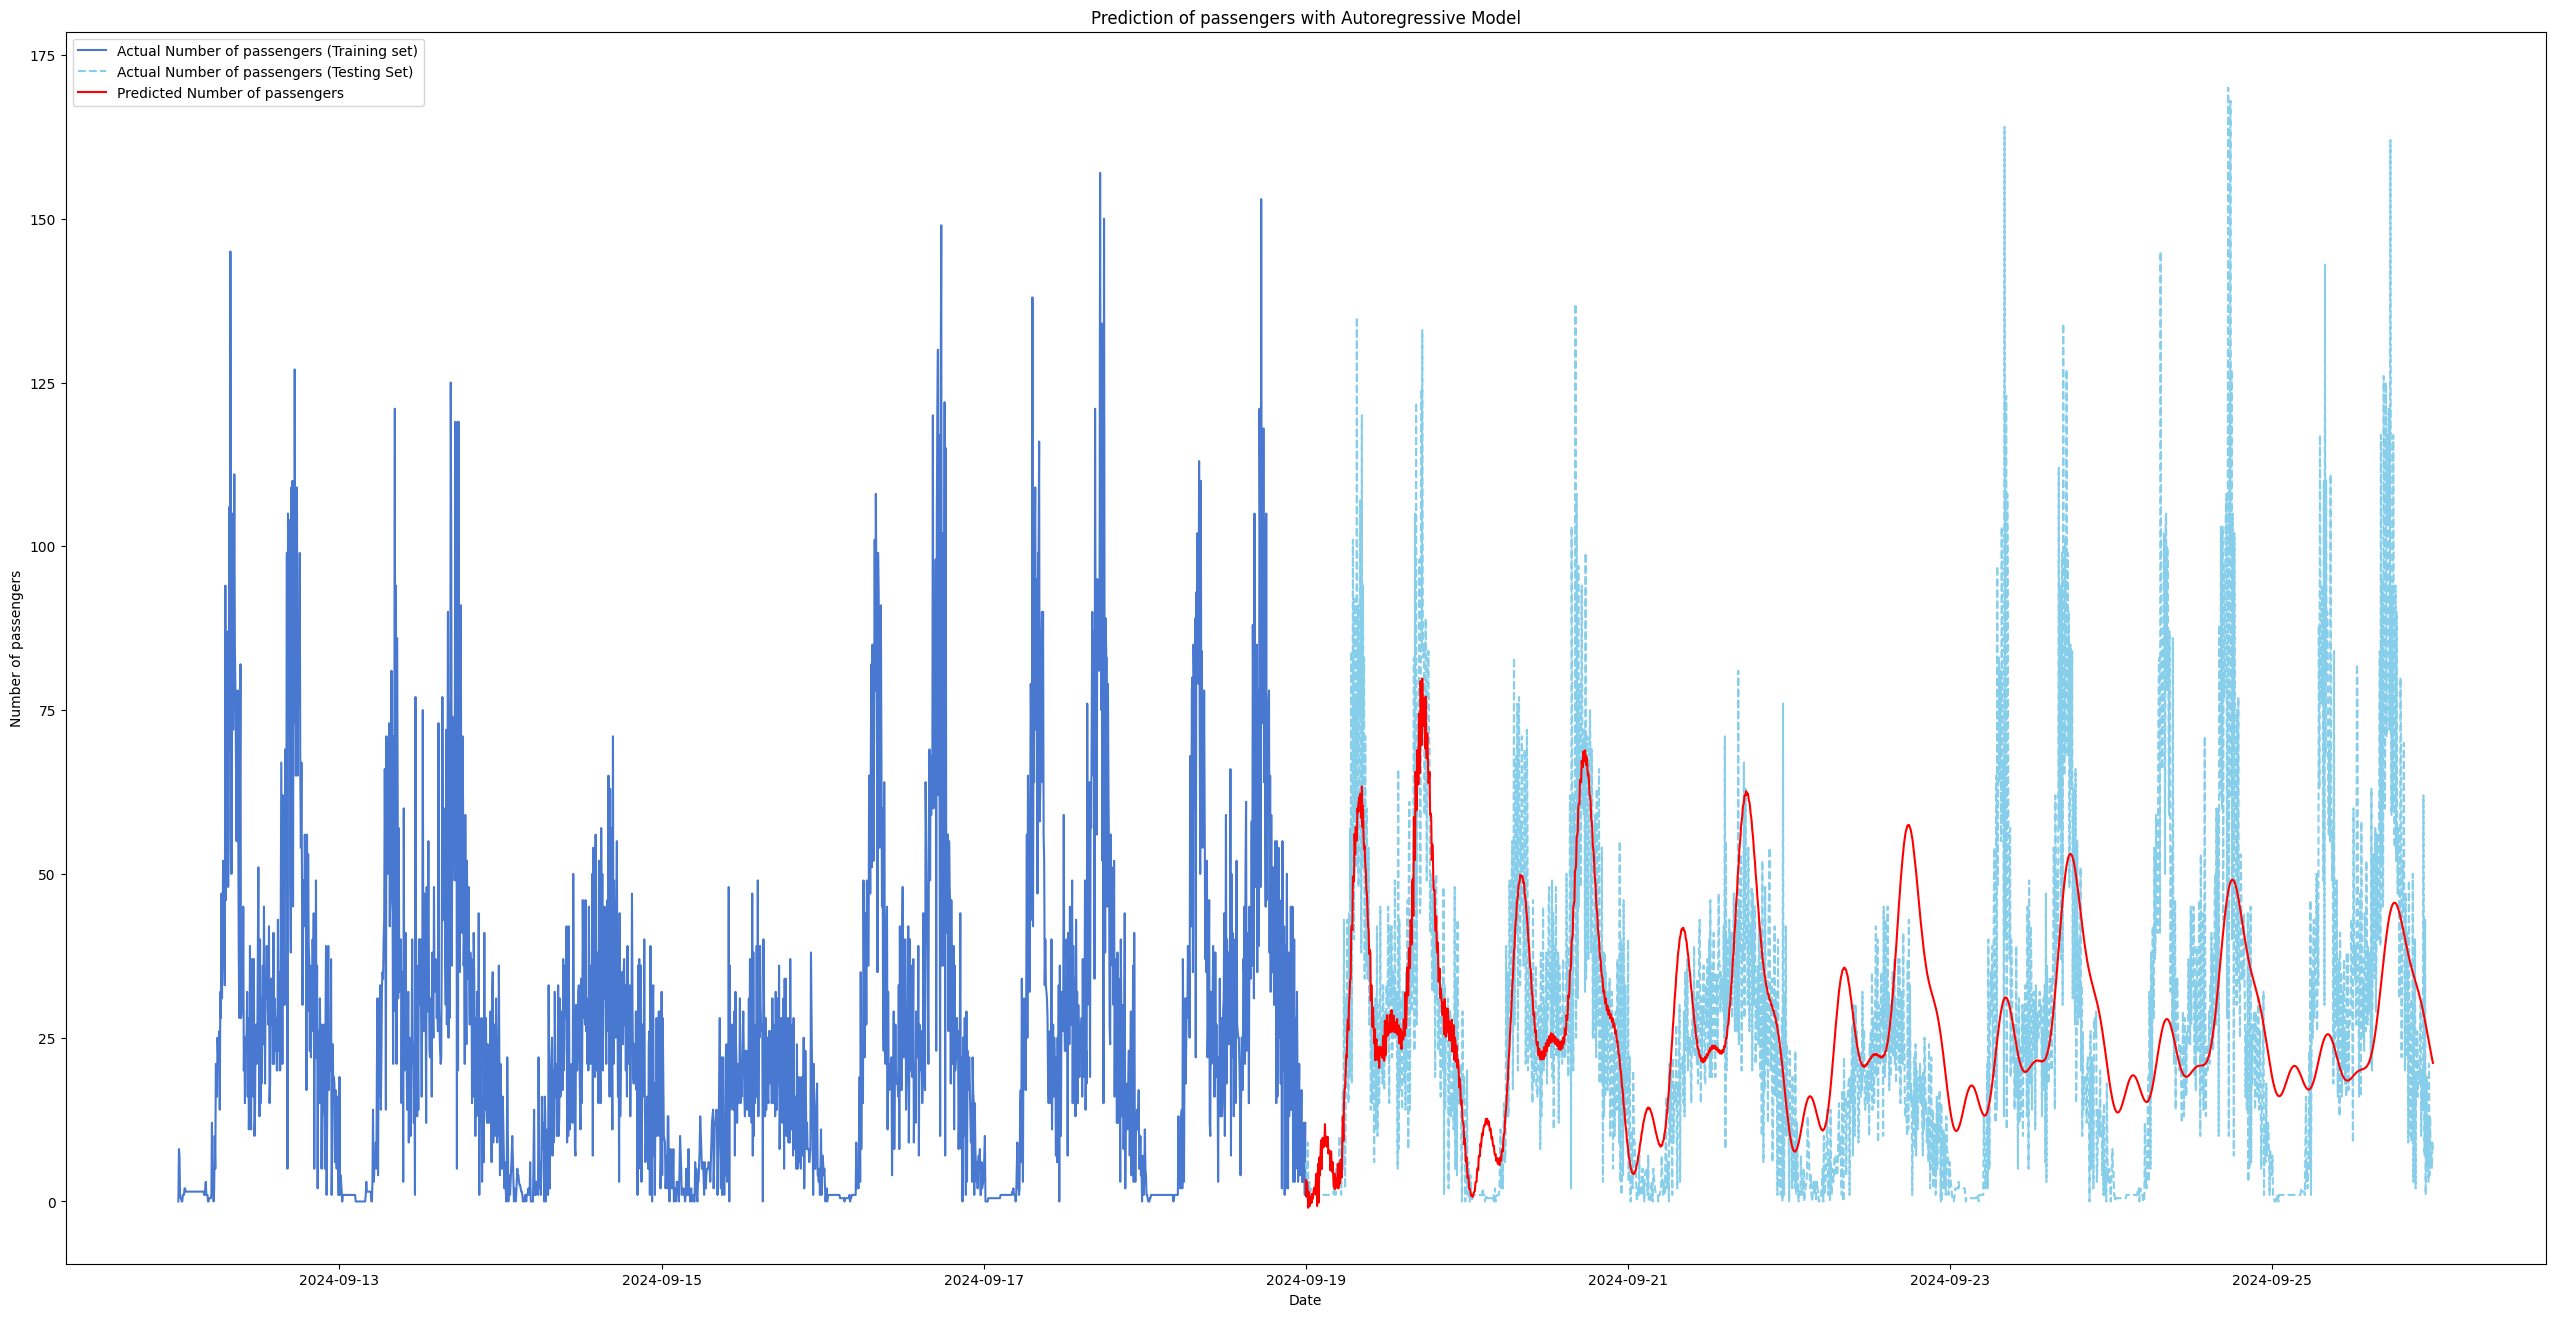

In [33]:
# Define the number of future time steps you want to predict (1 week)
forecast_steps_ost = 7*day

# Extend the predictions into the future for one week
future_indices = range(len(test_ost), len(test_ost) + forecast_steps_ost)
# enter prediction date
future_predictions = results_ar_ost.predict(start=len(train_ost), end=len(train_ost) + len(test_ost) + forecast_steps_ost - 1)


# Plot the testing data, training data, and predictions on our testing data for one week
plt.figure(figsize=(32, 16))
plt.plot(train_ost["Timestamp"][len(train_ost)-forecast_steps_ost:],train_ost["Ost-VBZ Total"][len(train_ost)-forecast_steps_ost:], label = "Actual Number of passengers (Training set)")
plt.plot(test_ost["Timestamp"][:forecast_steps_ost],test_ost["Ost-VBZ Total"][:forecast_steps_ost], label='Actual Number of passengers (Testing Set)', linestyle = "--",color = "skyblue")
plt.plot(test_ost["Timestamp"][:forecast_steps_ost],y_pred_ost[:forecast_steps_ost], label='Predicted Number of passengers', color = "red")

plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Prediction of passengers with Autoregressive Model')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\3593924651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ost["Timestamp"] = pd.to_datetime(test_ost["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\3593924651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ost["Timestamp"] = pd.to_datetime(train_ost["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\3593924651.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' inst

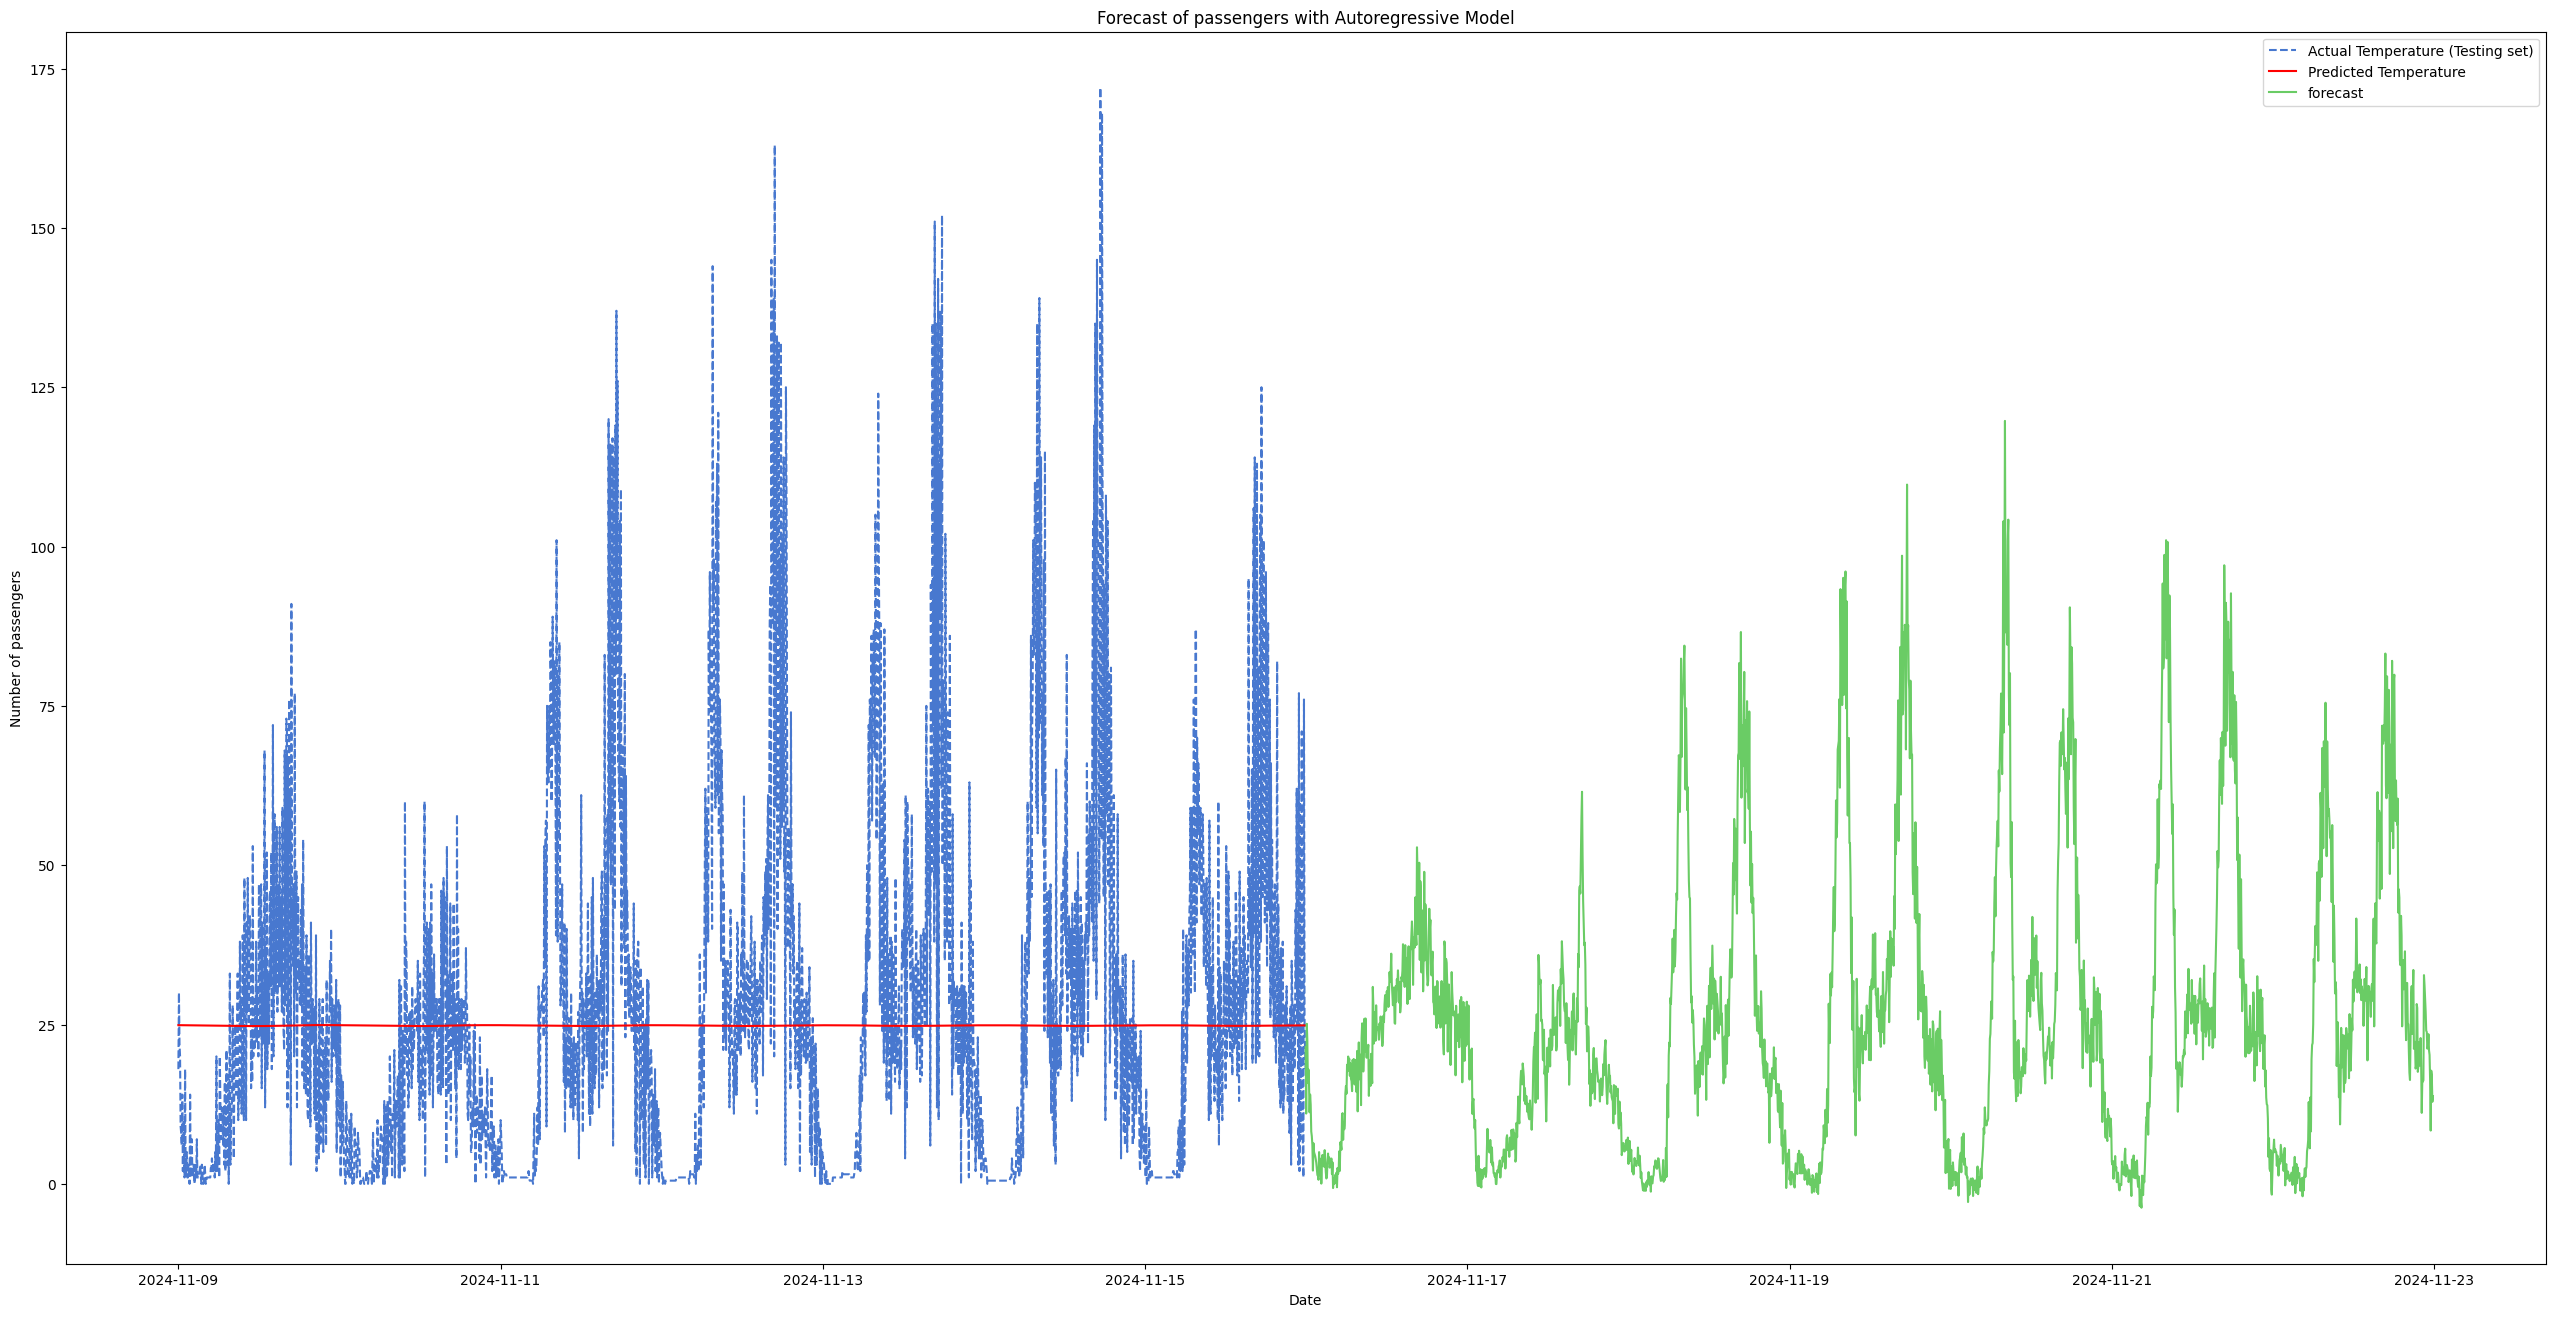

In [34]:
# Define the number of future time steps you want to predict (7 days)
forecast_steps_ost = 7*day
# convert stamp into datetime
test_ost["Timestamp"] = pd.to_datetime(test_ost["Timestamp"])
train_ost["Timestamp"] = pd.to_datetime(train_ost["Timestamp"])

# Extend the predictions into the future for one year 
future_indices_ost = range(len(test_ost), len(test_ost) + forecast_steps_ost)
future_predictions_ost = results_ar_ost.predict(start=len(test_ost), end=len(test_ost) + forecast_steps_ost - 1)
future_dates_ost = pd.date_range(start=test_ost["Timestamp"].iloc[-1], periods=forecast_steps_ost, freq='5T')

# Create date indices for the future predictions

# Plot the actual data in the testing set, predictions on the testing set, and one week of future predictions
plt.figure(figsize=(32, 16))
plt.plot(test_ost["Timestamp"][len(test_ost)-forecast_steps_ost:], test_ost["Ost-VBZ Total"][len(test_ost)-forecast_steps_ost:], label='Actual Temperature (Testing set)', linestyle = "--")
plt.plot(test_ost["Timestamp"][len(test_ost)-forecast_steps_ost:], y_pred_ost[len(test_ost)-forecast_steps_ost:], label='Predicted Temperature', color = "red")
plt.plot(future_dates_ost, future_predictions_ost[-forecast_steps_ost:], label ="forecast")
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Forecast of passengers with Autoregressive Model')
plt.show()

In [35]:
# Reproduce the model with the other side:
df_west_train = int(len(df_west)*0.808580858085808580858085808580858085808580858085)
train_west ,test_west = df_west[:df_west_train], df_west[df_west_train:]

from sklearn.model_selection import TimeSeriesSplit
# rolling windows
tscv = TimeSeriesSplit(n_splits=10)

len(train_west),len(test_west)

(70560, 16704)

In [36]:
# Create and train the autoregressive model
ar_model_west = AutoReg(train_west["West-VBZ total"], lags=lags)
results_ar_west = ar_model_west.fit()

In [37]:
# Make predictions on the test set
y_pred_west = results_ar_west.predict(start=len(train_west["West-VBZ total"]), end=len(train_west["West-VBZ total"]) + len(test_west["West-VBZ total"])-1)
#print(y_pred)
y_pred_west

70560     1.606863
70561     1.789458
70562     0.455855
70563     0.685214
70564    -1.088390
           ...    
87259    11.500751
87260    11.498340
87261    11.495863
87262    11.493320
87263    11.490713
Length: 16704, dtype: float64

In [38]:
mae_west = mean_absolute_error(test_west["West-VBZ total"], y_pred_west)
rmse_west = mean_squared_error(test_west["West-VBZ total"], y_pred_west)
print(f'Mean Absolute Error: {mae_west:.2f}')
print(f'Root Mean Squared Error: {rmse_west:.2f}')

Mean Absolute Error: 9.45
Root Mean Squared Error: 199.57


In [39]:
forecast_steps_west = 288
f_west = test_west["Timestamp"][:forecast_steps_west]
f_west
g_west = f_west[70560+(9/24)*288]    
g_west

'2024-09-19 09:00:00'

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\410346417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_west["Timestamp"] = pd.to_datetime(test_west["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\410346417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_west["Timestamp"] = pd.to_datetime(train_west["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\410346417.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' inst

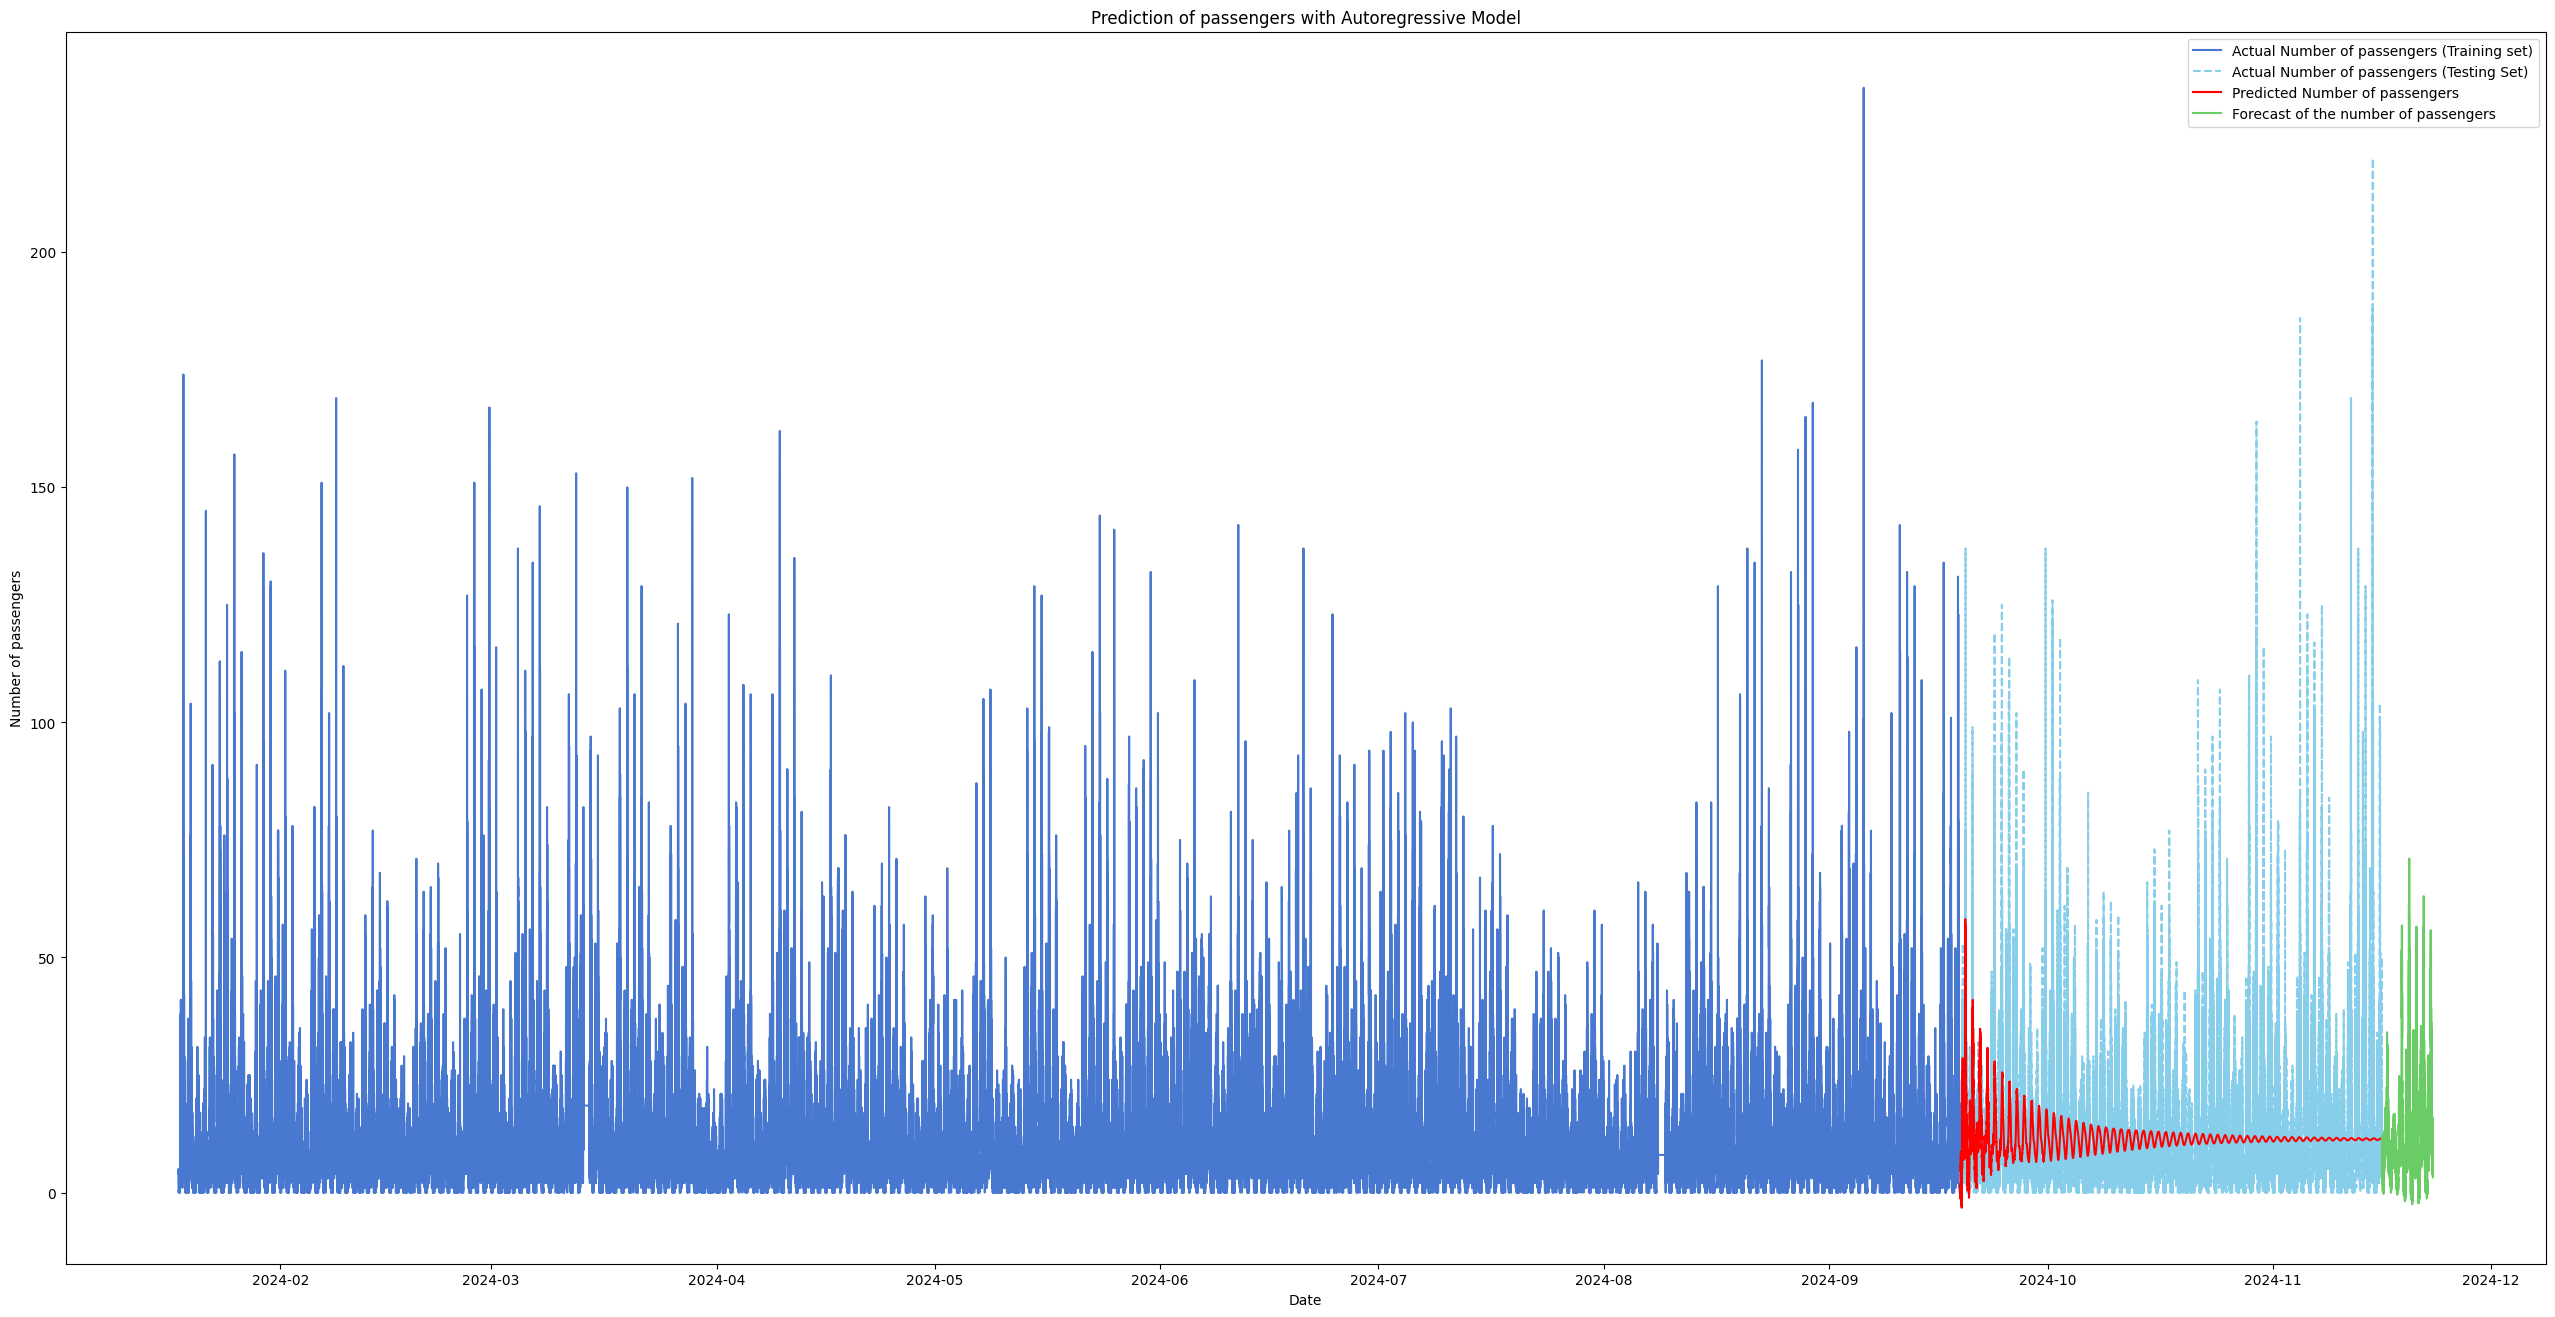

In [40]:
day = 288
forecast_steps_west = 7*day
# convert stamp
test_west["Timestamp"] = pd.to_datetime(test_west["Timestamp"])
train_west["Timestamp"] = pd.to_datetime(train_west["Timestamp"])

#future_indices_ost = range(len(test_ost), len(test_ost) + forecast_steps_ost)
future_predictions_west = results_ar_west.predict(start=len(test_west), end=len(test_west) + forecast_steps_west - 1)
future_dates_west = pd.date_range(start=test_west["Timestamp"].iloc[-1], periods=forecast_steps_west, freq='5T')

# Plot the actual data, existing predictions, and one year of future predictions
plt.figure(figsize=(32, 16))
plt.plot(train_west["Timestamp"],train_west["West-VBZ total"], label = "Actual Number of passengers (Training set)")
plt.plot(test_west["Timestamp"],test_west["West-VBZ total"], label='Actual Number of passengers (Testing Set)', linestyle = "--",color = "skyblue")
plt.plot(test_west["Timestamp"],y_pred_west, label='Predicted Number of passengers', color = "red")
plt.plot(future_dates_west, future_predictions_west, label = "Forecast of the number of passengers")

plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Prediction of passengers with Autoregressive Model')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\62001311.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates_west = pd.date_range(start=test_west["Timestamp"].iloc[-1], periods=forecast_steps_west, freq='5T')


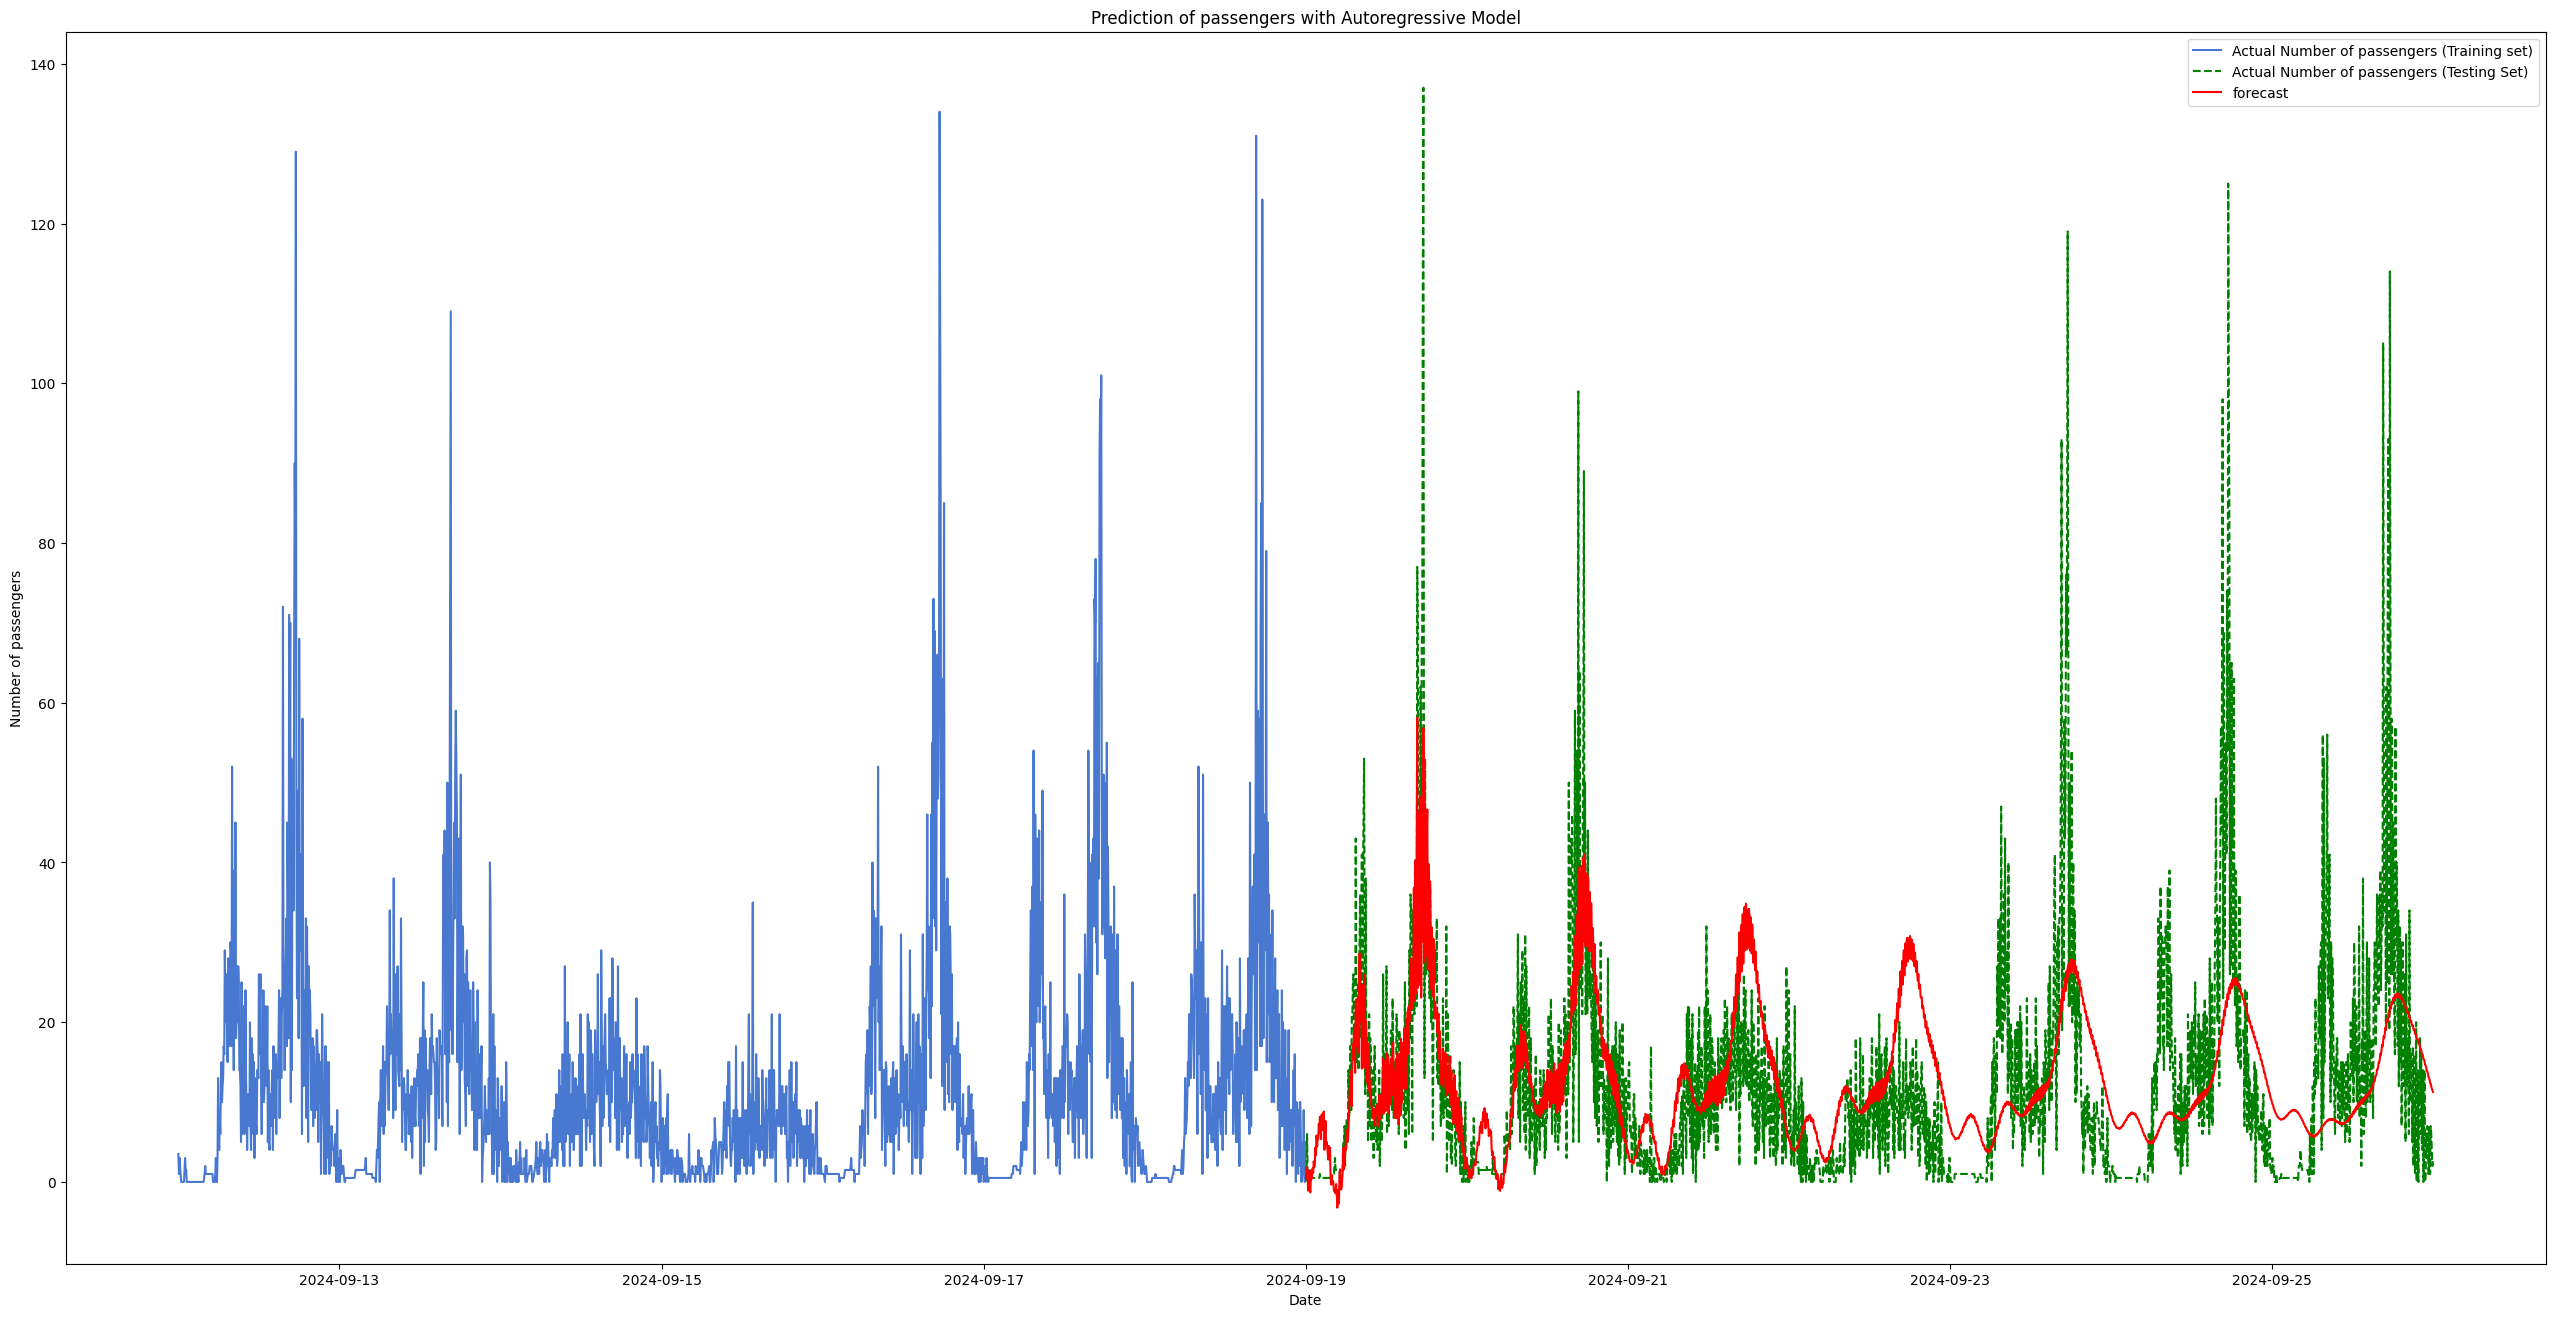

In [41]:
# Define the number of future time steps you want to predict (1 week)

#future_indices_ost = range(len(test_ost), len(test_ost) + forecast_steps_ost)
future_predictions_west = results_ar_west.predict(start=len(test_west), end=len(test_west) + forecast_steps_west - 1)
future_dates_west = pd.date_range(start=test_west["Timestamp"].iloc[-1], periods=forecast_steps_west, freq='5T')

# Create date indices for the future predictions

# Plot the actual data, existing predictions, and one year of future predictions
plt.figure(figsize=(32, 16))
plt.plot(train_west["Timestamp"][len(train_ost)-forecast_steps_west:],train_west["West-VBZ total"][len(train_west)-forecast_steps_west:], label = "Actual Number of passengers (Training set)")
plt.plot(test_west["Timestamp"][:forecast_steps_west],test_west["West-VBZ total"][:forecast_steps_west], label='Actual Number of passengers (Testing Set)', linestyle = "--",color = "green")
plt.plot(test_west["Timestamp"][:forecast_steps_west], y_pred_west[:forecast_steps_west], label ="forecast", color = "red")

plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Prediction of passengers with Autoregressive Model')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\2718219508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_west["Timestamp"] = pd.to_datetime(test_west["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\2718219508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_west["Timestamp"] = pd.to_datetime(train_west["Timestamp"])
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\2718219508.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' 

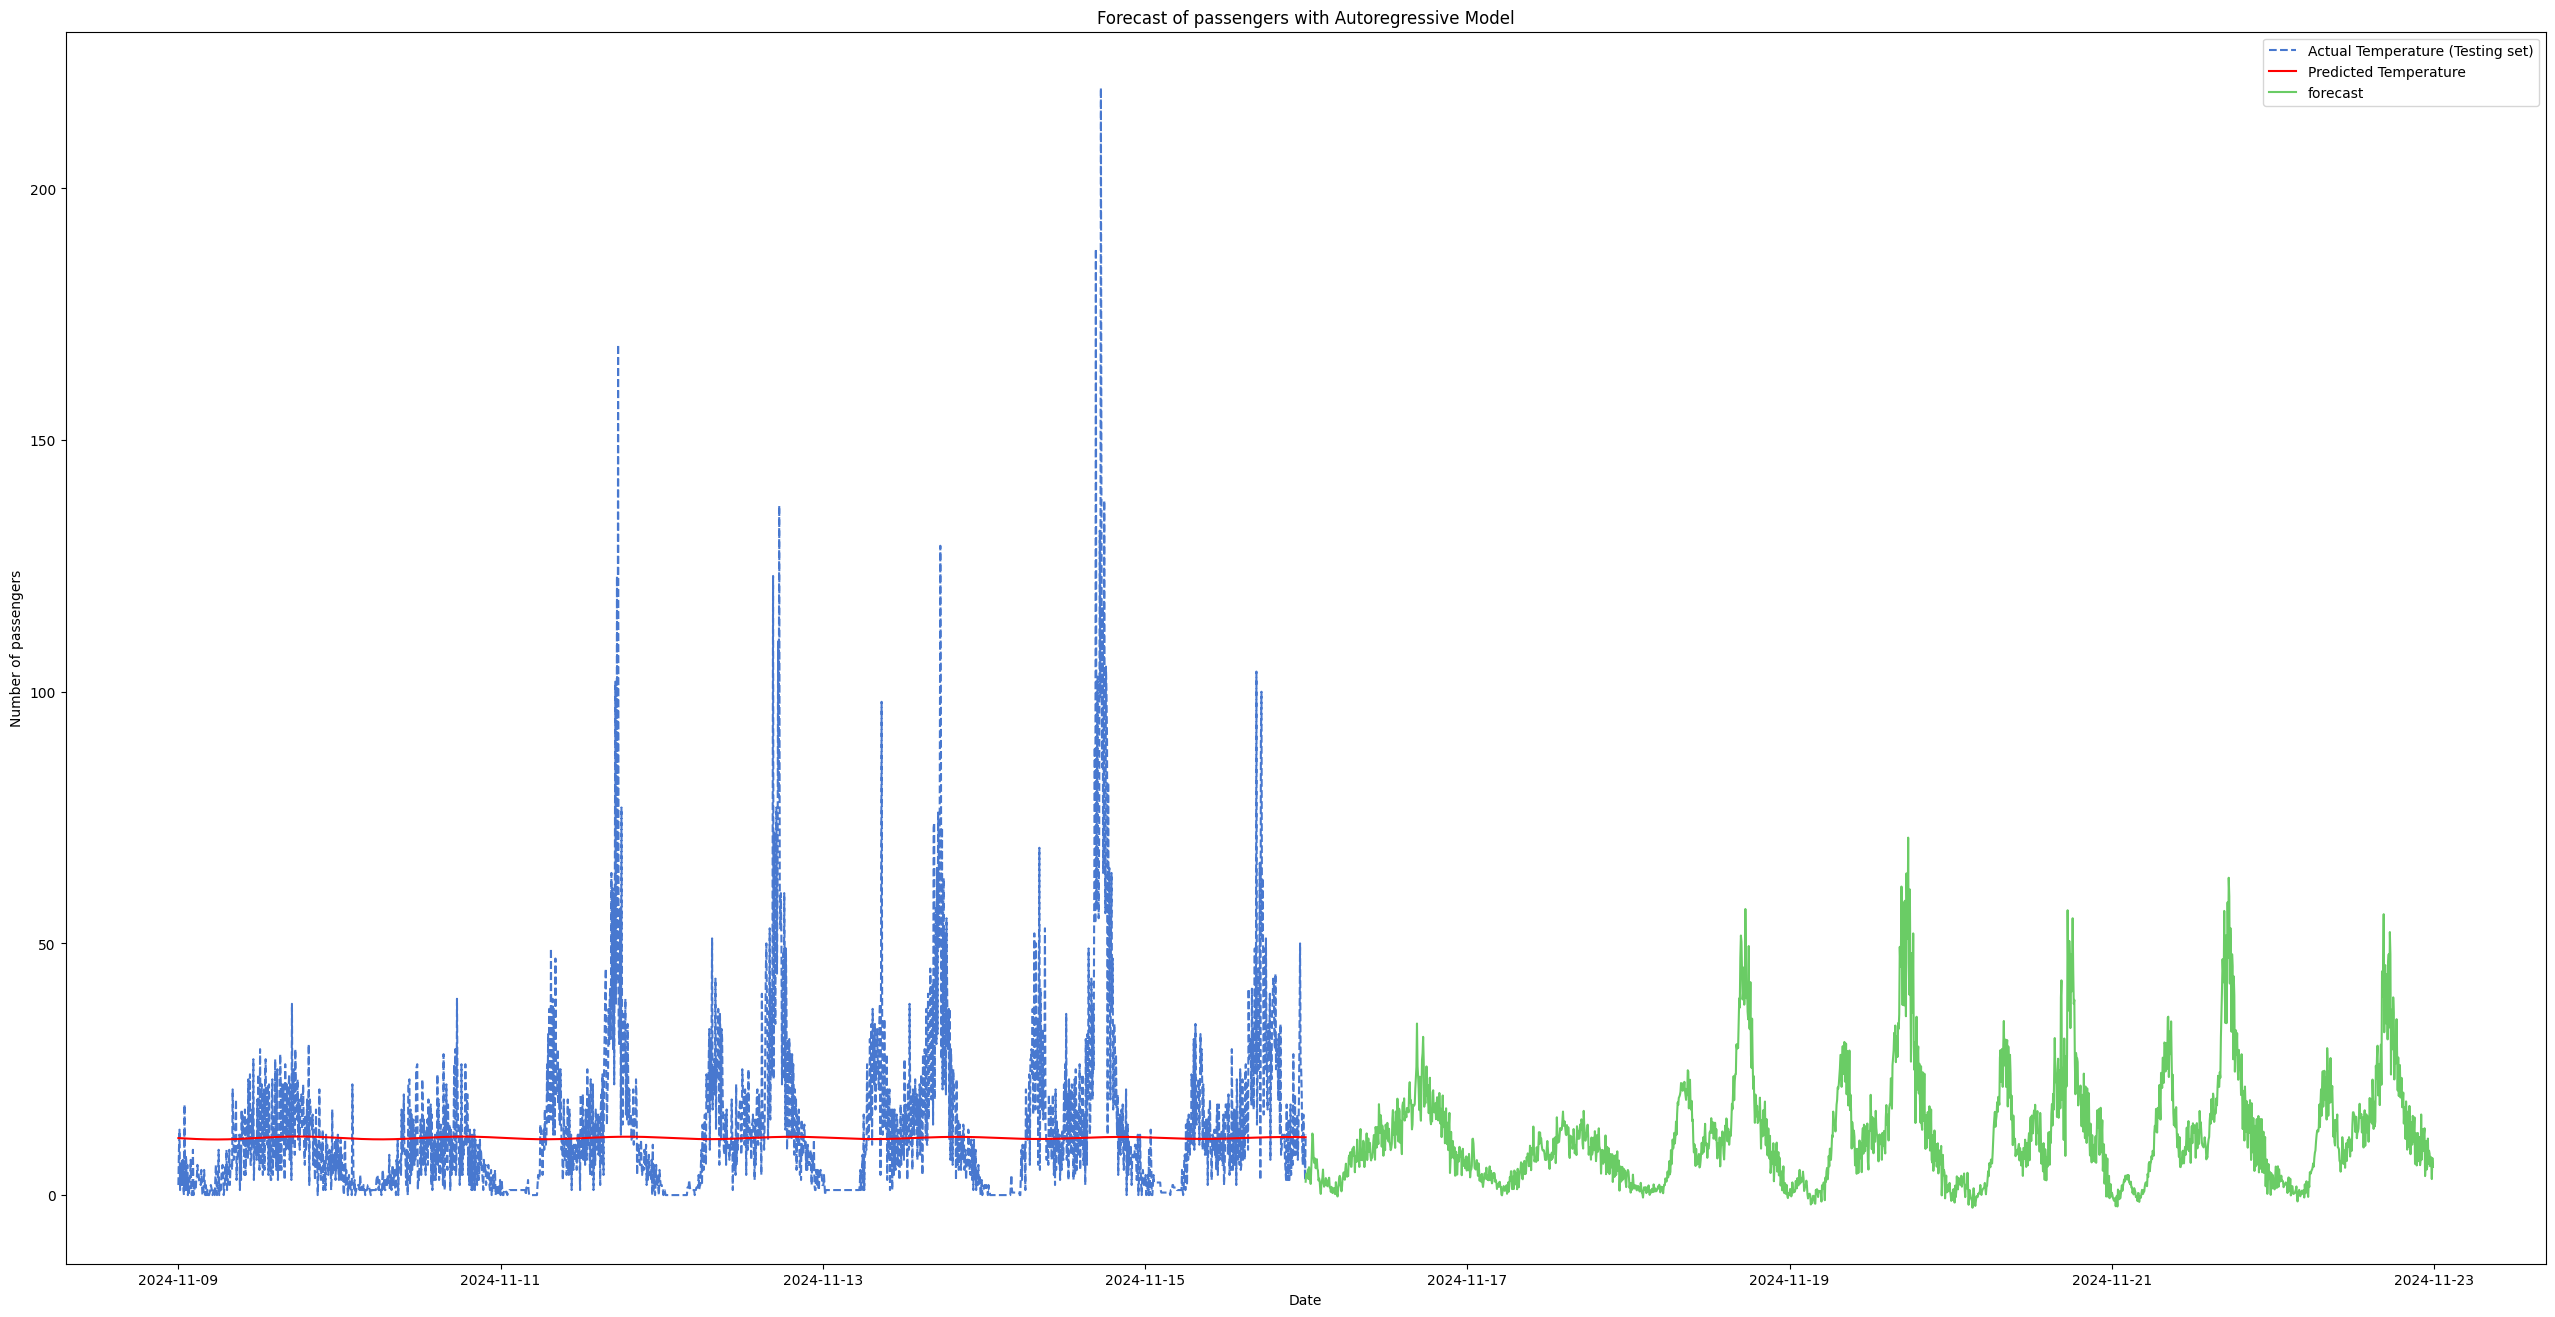

In [42]:
# Define the number of future time steps you want to predict (1 day)
forecast_steps_west = 7*day
# convert stamp
test_west["Timestamp"] = pd.to_datetime(test_west["Timestamp"])
train_west["Timestamp"] = pd.to_datetime(train_west["Timestamp"])

# Extend the predictions into the future for one year
future_indices_west = range(len(test_west), len(test_west) + forecast_steps_west)
future_predictions_west = results_ar_west.predict(start=len(test_west), end=len(test_west) + forecast_steps_west - 1)
future_dates_west = pd.date_range(start=test_west["Timestamp"].iloc[-1], periods=forecast_steps_west, freq='5T')

# Create date indices for the future predictions

# Plot the actual data, existing predictions, and one year of future predictions
plt.figure(figsize=(32, 16))
plt.plot(test_west["Timestamp"][len(test_west)-forecast_steps_west:], test_west["West-VBZ total"][len(test_west)-forecast_steps_west:], label='Actual Temperature (Testing set)', linestyle = "--")
plt.plot(test_west["Timestamp"][len(test_west)-forecast_steps_west:], y_pred_west[len(test_west)-forecast_steps_west:], label='Predicted Temperature', color = "red")
plt.plot(future_dates_west, future_predictions_west[-forecast_steps_west:], label ="forecast")
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Forecast of passengers with Autoregressive Model')
plt.show()